### Instalando pydataxm - API XM



In [16]:
!pip install pydataxm


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importando Librerias

In [14]:
from pydataxm import *
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np

### Obteniendo datos de la API XM

In [15]:
# https://github.com/EquipoAnaliticaXM/API_XM

objAPI= pydataxm.ReadDB() # Objeto API XM
df_metricas=objAPI.get_collections() # Obteniendo listado de metricas disponibles asociadas a Aportes
df_metricas.head()

KeyboardInterrupt: 

#### Consultando las metrica de interes

In [3]:
def get_data(metrica,fi=dt.date(2000,1,1),ff=dt.date(2024,12,31)):
  objAPI= pydataxm.ReadDB() # Objeto API XM
  df=objAPI.request_data(
    metrica,'Rio',fi,ff
  ) # Consulta de información
  df=df[df['Name']=='NARE']
  df.drop(columns=['Id'],inplace=True)
  df['Value']=round(df['Value'],3) # Unidades en GWh
  df.rename(columns={'Value':metrica},inplace=True)

  return df

In [4]:
df=get_data('AporCaudal')
df.head()

,Name,AporCaudal,Date
14,NARE,43.51,2000-01-01
32,NARE,43.67,2000-01-02
50,NARE,41.21,2000-01-03
68,NARE,43.80,2000-01-04
86,NARE,40.62,2000-01-05


In [6]:
df.isna().sum()

Name          0
AporCaudal    0
Date          0
dtype: int64

### Serie de Aportes

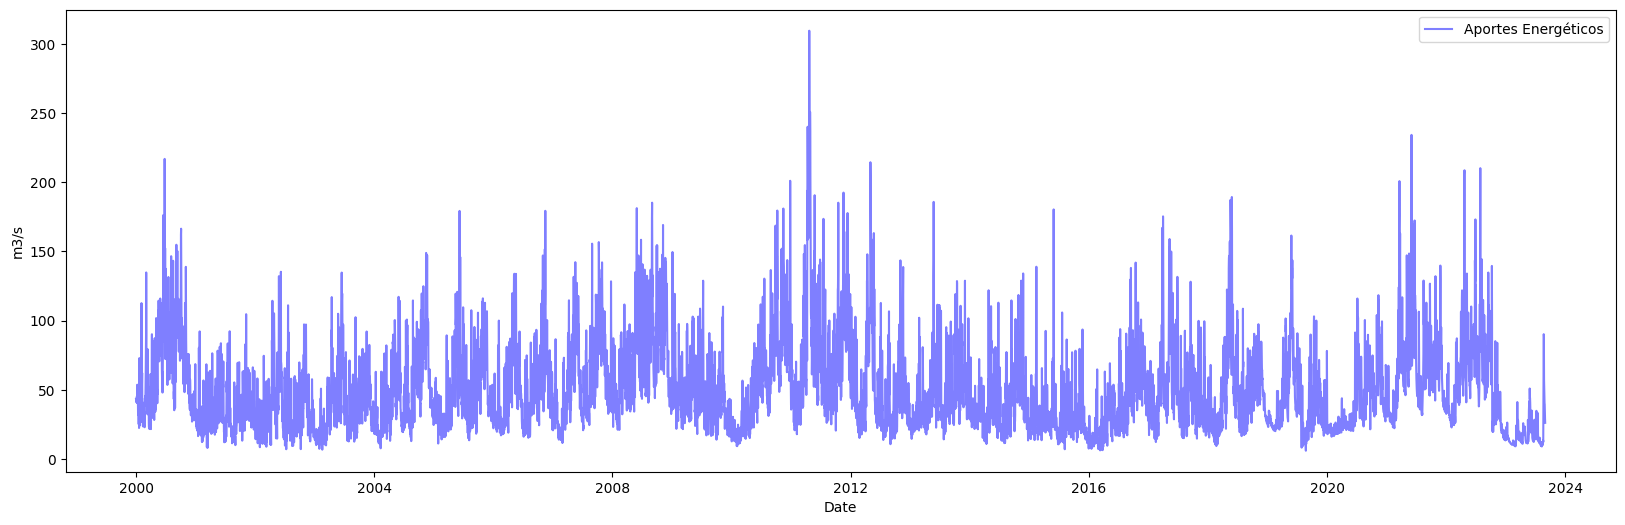

In [8]:
def plot_series(df):

  plt.figure(figsize=(20,6))

  plt.plot(df['Date'], df['AporCaudal'], label='Aportes Energéticos',color='blue', alpha=0.5)

  plt.xlabel('Date')
  plt.ylabel('m3/s')

  plt.legend()
  plt.show()


plot_series(df)

### Variables Meteorologicas

In [9]:
def read_csv(path):
    dfs= [ pd.read_csv(os.path.join(path, file),index_col=0,parse_dates=True) 
        for file in os.listdir(path) if file.endswith('.csv') and 'Aportes' not in file
    ]
    
    return pd.concat(dfs, axis=1).reset_index().rename(columns={'index':'Date'})

df_meteorological = read_csv(os.getcwd())

### Dataset Aportes

In [ ]:
df=df_meteorological.merge(df, on='Date', how='right')
df.head()
df.to_csv('Aportes.csv', index=False)